In [1]:
!pip install make-spirals

# Naïve Bayes Classifier
 
El clasificador *Naïve Bayes* es un algoritmo de aprendizaje supervisado basado en el Teorema de Bayes. El adjetivo *naïve* (en español *ingenuo*) se establece por asumir independencia entre cada para de características (*features*) dada la clase a la que pertenece la muestra.
 
El Teorema de Bayes tiene la siguiente formulación:
 
$$
P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}
$$
 
Donde:
 
- $P(A)$ y $P(B)$ son las probabilidades a priori.
- $P(B|A)$ es la probabilidad de $B$ condicionada por $A$.
- $P(A|B)$ es la probabilidad a posteriori.
 
Cuando trabajamos en un contexto de *machine learning*, y más concretamente en un problema de clasificación, disponemos de un conjunto de datos con $m$ muestras de la forma $x_1,\dots,x_n$ etiquetadas para una clase $y$. Si le damos un enfoque probabilístico a esta clasificación, nuestro objetivo será calcular la probabilidad a posteriori $P(y|x_1,\dots,x_n)$, es decir, dime la probabilidad de pertenencia a la clase $y$ dada la muestra $x_1,\dots,x_n$.
 
Por tanto, podemos reformular el Teorema de Bayes del siguiente modo:
 
$$
P(y|x_1,\dots,x_n)=\frac{P(y) \cdot P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}
$$

Observamos que $P(x_1,\dots,x_n|y)$ puede descomponerse del siguiente modo:

$$
P(x_1,\dots,x_n|y) = P(x_1|y) \cdot P(x_2,\dots,x_n|y) = P(x_1|y) \cdot P(x_2|y,x_1) \cdot P(x_3,\dots,x_n|y,x_1,x_2) = P(x_1|y) \cdot P(x_2|y,x_1) \cdot P(x_3|y,x_1,x_2) \cdots P(x_n|y,x_1,\dots,x_{n-1})
$$

Puesto que *Naïve Bayes* asume independencia condicional entre las variables $x_1,\dots,x_n$, se verifica que:

$$
P(x_2|y,x_1) = P(x_2|y)
$$

$$
P(x_3|y,x_1,x_2) = P(x_3|y)
$$

$$
P(x_n|y,x_1,\dots,x_{n-1}) = P(x_n|y)
$$

Y por lo tanto:

$$
P(x_1,\dots,x_n|y) = \prod_{j=1}^{n} P(x_j|y)
$$

Dejando reformulado el cáclulo de $P(y|x_1,\dots,x_n)$:
 
$$
P(y|x_1,\dots,x_n) = \frac{P(y) \prod_{j=1}^{n} P(x_j|y)}{P(x_1,\dots,x_n)}
$$
 
Observamos que $P(x1,\dots,x_n)$ únicamente depende de una muestra $x$ y, por lo tanto, adquiere un valor constante una vez prefijado el conjunto de datos de entrada sobre el que aprende el algoritmo. Por ello, podemos, de nuevo, simplificar la ecuación anterior a:
 
$$
P(y|x_1,\dots,x_n) \propto P(y) \prod_{j=1}^{n} P(x_j|y)
$$
 
En definitiva $P(y|x_1,\dots,x_n)$ nos devuelve una puntuación de pertenencia de una muestra $x_1,\dots,x_n$ a la clase $y$ siendo dicha puntuación es proporcional a la probabilidad de pertenecer a esa clase. Por tanto, podemos determinar la predicción del clasificador ($\hat{y}$) buscando la clase que maximice dicha puntuación:
 
$$
\hat{y} = \arg \max_y P(y) \prod_{j=1}^{n} P(x_j|y)
$$
 
Resaltar que $\hat{y}$ no devuelve la probabilidad de pertenecer a una clase al haber suprimido $P(x_1,\dots,x_n)$ de la ecuación. Sin embargo, al ser el conjunto de clases finito, podemos recuperar esta probabilidad atendiendo a la siguiente ecuación:
 
$$
P(y=c|x_1,\dots,x_n) = \frac{P(y=c) \prod_{j=1}^{n} P(x_j|y=c)}{\sum_{k=1}^{K} \left(P(y=k) \prod_{j=1}^{n} P(x_j|y=k) \right)}
$$
 
Siendo $K$ el número total de clases que se desea predecir.
 
A pesar de la simplicidad del método y de asumir independencia entre cada par de variables, situación que rara vez se da en la vida real, el clasificador Naïve Bayes funciona sorprendentemente bien con conjuntos de datos del mundo real. En especial, ha sido ampliamente utilizado para trabajar con clasificación de textos.


Cuando queremos aplicar el clasificador *Naïve Bayes* en un contexto de *machine learning* deberemos aprender $P(y)$ y $P(x_j|y)$. 

El aprendizaje de $P(y)$ resulta trivial analizando el número de muestras de nuestro conjunto de datos que pertenecen a cada clase. Además, este valor, cuando el conjunto de datos está perfectamente balanceado (i.e. existen exactamente el mismo número de muestras de cada clase) dicho valor es constante para todas las clases y no influye en la etiqueta asignada en la predicción ($\hat{y}$).

Por lo tanto, la esencia del clasificador *Naïve Bayes* radica en el cálculo de $P(x_j|y)$. Analizaremos cada una de las posibles implementaciones en los siguientes apartados.

## Categorical Naïve Bayes
 
La implementación de *Categorical Naïve Bayes* es la más simple e intuitiva que podemos encontrar. Esta implementación asume que todas las características del conjunto de datos ($x_1,\dots,x_n$) son discretas y, por tanto, toman sus valores a partir de un conjunto pre-establecido.
 
Por ello, el cálculo de $P(x_j|y)$ se reduce a "contar casos" tal y como se indica en la siguiente ecuación:
 
$$
P(x_j=t|y=c) = \frac{\#\lbrace i \in S | x_{i,j}=t, y_i=c \rbrace + \alpha}{\#\lbrace i \in S | y_i=c \rbrace + \alpha \cdot n_j}
$$
 
Donde $S={1, 2, 3,\dots,m}$ denota las $m$ muestras del conjunto de datos y $n_j$ indica el número de valores posibles de la característica $j$.
 
Observamos, además, que se añade un hiper-parámetro $\alpha$ para evitar  $P(x_j|y)=0$.
 
En `sklearn` este algoritmo se encuentra implementado en la clase [`sklearn.naive_bayes.CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB). Es importante destacar que para poder usarse las categorías asociadas a cada característica deben asociarse a un valor numérico (iniciado en 0) haciendo uso, por ejemplo, de [`sklearn.preprocessing.OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).
 
Veamos un ejemplo con un conjunto de datos sencillo:
 
| x1 | x2 | y |
| -- | -- | - |
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 2 |
| 2  | 1  | 2 |
 
 
 



In [2]:
import numpy as np
X = np.array([[0, 0], [1, 0] , [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

In [3]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(alpha=0)
clf.fit(X, y)

/opt/conda/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

El atributo `category_count_`devuelve los contadores obtenidos durante el entrenamiento. Devuelve una lista de matrices en las que: cada elemento de la lista se corresponde con una *feature*, cada fila de las matrices se corresponde con una clase y cada columna de las matrices con uno de los posibles valores de la *feature*. Las celdas contienen los contadores.
 
Por ejemplo, observamos que el número de veces que el valor de `x1` toma el valor `0` para la clase `1` (`clf.category_count_[0][0][0]`) es `1` o que el número de veces que el valor de `x2` toma el valor `1` para la clase `2` (`clf.category_count_[1][1][1]`) es `2`.
 



In [4]:
clf.category_count_

[array([[1., 1., 0.],
        [0., 1., 1.]]),
 array([[2., 0.],
        [0., 2.]])]

## Gaussian Naïve Bayes
 
La implementación *Gaussian Naive Bayes* es la más frecuente en contextos de *machine learning*, ya que asume que las características del conjunto de datos ($x_1,\dots,x_n$) son continuas y, además, siguen una distribución normal. Aunque esto no sea cierto, esta suposición proporciona generalmente buenos resultados de clasificación.
 
Empleando una distribución normal, el cálculo de $P(x_j|y)$ se reduce a emplear la función de densidad de la distribución gausiana:
 
$$
P(x_j|y) = \frac{1}{\sqrt{2\pi\sigma^2_{j,y}}}{exp \left( - \frac{\left( x_j - \mu_{j,y} \right)^2}{2\sigma^2_{j,y}} \right)}
$$
 
El modelo, por tanto, aprende los parámetros $\sigma_{j,y}$ y $\mu_{j,y}$ para cada característica $j$ y clase $y$ existente.
 



En `sklearn` este algoritmo se encuentra implementado en la clase [`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB). Es conveniente que los datos de entrada hayan sido previamente estandarizados.
 
Veamos su salida sobre el siguiente conjunto de datos de ejemplo:
 
| x1 | x2 | y |
| -- | -- | - |
| -1 | -1 | 1 |
| -2 | -1 | 1 |
| -3 | -2 | 1 |
|  1 |  1 | 2 |
|  2 |  1 | 2 |
|  3 |  2 | 2 |
 



In [5]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

El atributo `theta_` contiene los valores aprendidos de $\mu_{j,y}$ en una matriz. Cada fila representa una clase y cada columna una de las *features*.  Observamos, por ejemplo, que $\mu_{1,2}$ (media de la *feature* `x1` para la clase `2`) es `-1.33333333`. Dada la simplicidad del ejemplo, podemos verificar que esto es cierto, puesto que se obtiene como:

$$
\mu_{1,2} = \frac{(-1) + (-1) + (-2)}{3} = - \frac{4}{3} = -1.33333333
$$

In [7]:
clf.theta_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

El atributo `sigma_` contiene los valores aprendidos de $\sigma_{j,y}$ en una matriz. Al igual que antes. cada fila representa una clase y cada columna una de las *features*. Observamos, por ejemplo, que $\sigma_{1,1}$ (desviación típica de la *feature* `x1` para la clase `1`) es `0.66666667`.
 



In [8]:
clf.sigma_

array([[0.66666667, 0.22222223],
       [0.66666667, 0.22222223]])

Como cualquier clasificador, en esencia, Naïve Bayes busca encontrar el hiper-plano de separación entre las clases a clasificar. Al operar Gaussian Naïve Bayes sobre valores contínuos podemos dibujar dicho hiper-plano y asociarlo a la probabilidad de pertenecer a cada una de las clases a analizar.

La siguiente imagen muestra dos nubes de puntos generadas a partir de dos distribuciones guasianas y la correspondiente clasificación realizada por Naïve Bayes:

<ipython-input-9-4bf6b4d06d79>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r)


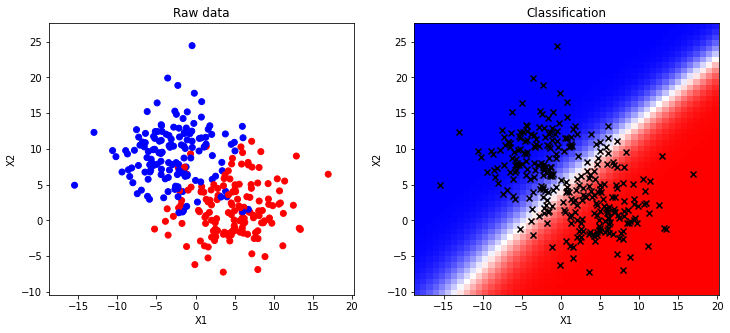

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=4, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

# Raw data

ax1.set_title('Raw data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim(min[0], max[0])
ax1.set_ylim(min[1], max[1])

ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

# Classified data

clf = GaussianNB()
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape) 

ax2.set_title('Classification')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_xlim(min[0], max[0])
ax2.set_ylim(min[1], max[1])

ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r)
ax2.scatter(X[:,0], X[:,1], c='k', marker='x')

Naïve Bayes funciona también correctamente para problemas de clasificación multiclase:

<ipython-input-10-cfe7a279387e>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.viridis)


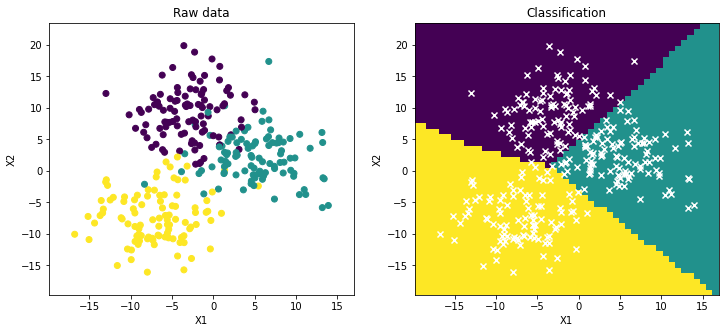

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=4, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

# Raw data

ax1.set_title('Raw data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim(min[0], max[0])
ax1.set_ylim(min[1], max[1])

ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis)

# Classified data

clf = GaussianNB()
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

ax2.set_title('Classification')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_xlim(min[0], max[0])
ax2.set_ylim(min[1], max[1])

ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.viridis)
ax2.scatter(X[:,0], X[:,1], c='w', marker='x')

Sin embargo, el principio de ingenuidad (i.e. la suposición de independencia entre las variables) complica en gran medida la clasificación no lineal de los datos:

<ipython-input-11-ccbc8c9326fb>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)


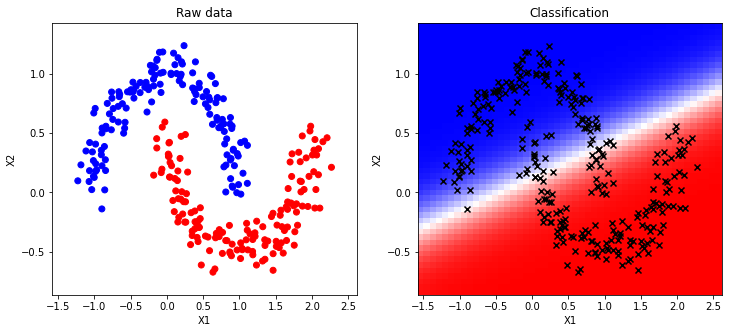

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Raw data

ax1.set_title('Raw data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim(min[0], max[0])
ax1.set_ylim(min[1], max[1])

ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

# Classified data

clf = GaussianNB()
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape) 

ax2.set_title('Classification')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_xlim(min[0], max[0])
ax2.set_ylim(min[1], max[1])

ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c='k', marker='x')

<ipython-input-12-cc9ddd35711e>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)


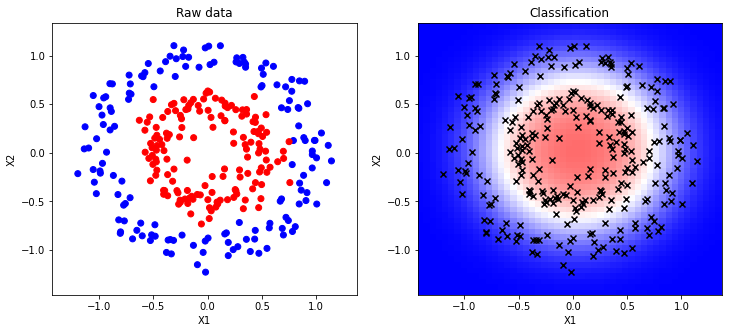

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Raw data

ax1.set_title('Raw data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim(min[0], max[0])
ax1.set_ylim(min[1], max[1])

ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

# Classified data

clf = GaussianNB()
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape) 

ax2.set_title('Classification')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_xlim(min[0], max[0])
ax2.set_ylim(min[1], max[1])

ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c='k', marker='x')

<ipython-input-13-2a45abf08600>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)


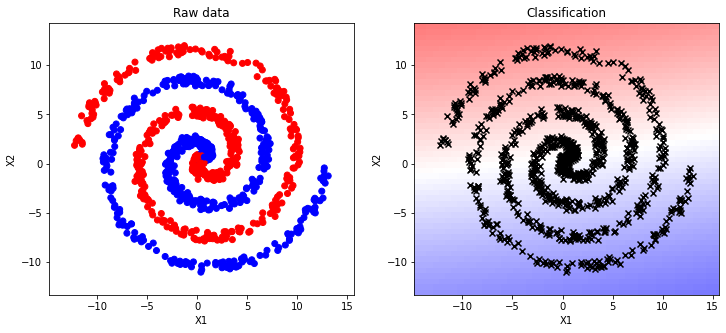

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from make_spirals import make_spirals

X, y = make_spirals(n_samples=1000, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Raw data

ax1.set_title('Raw data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim(min[0], max[0])
ax1.set_ylim(min[1], max[1])

ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

# Classified data

clf = GaussianNB()
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape) 

ax2.set_title('Classification')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_xlim(min[0], max[0])
ax2.set_ylim(min[1], max[1])

ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c='k', marker='x')

## Multinominal Naïve Bayes
 
La implementación *Multinomial Naïve Bayes* presupone que las muestras del conjunto de datos siguen una distribución multinomial. Esta situación sucede muy frecuentemente en el contexto de la clasificación de texto, donde, al utilizar la técnica de *bag of words* para representar un documento de texto, las muestras toman una distribución multinomial.
 
Recordemos que *bag of words* se encarga de construir un diccionario con las $n$ palabras que aparecen en los textos evaluados y luego representa cada una de las muestras mediante $x_1,\dots,x_n$, conteniendo $x_j$ el número de veces que aparece la $j$-ésima palabra en documento.
 
En este caso, $P(x_j|y)$ se calcula en función de la frecuencia relativa de la palabra en el documento:
 
$$
P(x_j|y)=\frac{\alpha + \sum_{i \in S_y} x_{i,j}}{\alpha \cdot n + \sum_{j^\ast = 1}^{n} \sum_{i \in S_y} x_{i,j^\ast}}
$$
 
Donde $S_y$ representa las muestras de la clase $y$ y $\alpha$ es un hiper-parámetro para evitar las probabilidades con valor 0.
 
En `sklearn` este algoritmo se encuentra implementado en la clase [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).
 



Veamos estos con un sencillo ejemplo que consta de los siguientes 4 textos:

| Texto                | Clase    |
| -------------------- | -------- |
| "fútbol madrid"      | fútbol   |
| "fútbol barcelona"   | fútbol   |
| "política madrid"    | política |
| "política barcelona" | política |


Tras aplicar *bag of words* nos quedaría el siguiente conjunto de datos:

| fútbol | madrid | barcelona | política | y |
| ------ | ------ | --------- | -------- | - |
| 1      | 1      | 0         | 0        | 1 |
| 1      | 0      | 1         | 0        | 1 |
| 0      | 1      | 0         | 1        | 2 |
| 0      | 0      | 1         | 1        | 2 |

In [ ]:
import numpy as np
X = np.array([[1, 1, 0, 0], [1, 0, 1, 0,] , [0, 1, 0, 1], [0, 0, 1, 1]])
y = np.array([1, 1, 2, 2])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0)
clf.fit(X, y)

Mediante el atributo `feature_count_` podemos recuperar las frecuencias absolutas de cada palabra en cada clase. El atributo contiene una matriz en la que las filas son las clases, las columnas las palabras y las celdas contienen los contadores. Vemos, por ejemplo, que para la clase `1` la palabra `fútbol` aparece `2` veces.

In [ ]:
clf.feature_count_

El atributo `feature_log_prob` permite recuperar $log \left(P(x_j|y)\right)$. Al igual que antes, el atributo contiene una matriz en la que las filas son las clases, las columnas las palabras y las celdas contienen las log. probabilidades. Observamos que las palabras `madrid` y `barcelona` no tienen mucha incidencia en determinar la clase, mientras que `fútbol` y `política` si la tienen.

In [ ]:
clf.feature_log_prob_

## Bernoulli Naïve Bayes
 
La implementación *Bernoulli Naïve Bayes* asume que los datos siguen distribuciones de Bernoulli multivariantes. Con otras palabras, asumen que todos datos del conjunto de datos son binarios, indicando $1$ que una muestra cumple una determinada *feature* y $0$ que no la cumple.
 
Esta representación es extremadamente frecuente en la clasificación de textos cortos (por ejemplo, *tweets*) donde aplicar *bag of words* proporcionaría muestras mayoritariamente compuestas de valores $0$ y $1$.
 
El cálculo de $P(x_j|y)$ se realiza de acuerdo a la siguiente ecuación:
 
$$
P(x_j|y) = x_j \cdot P(j|y) + (1-x_j) (1 - P(j|y))
$$
 
Donde $P(j|y)$ denota la probabilidad de pertenecer a la clase $y$ cuando la característica $j$ es verdadera.
 
En `sklearn` este algoritmo se encuentra implementado en la clase [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB). Es importante destacar que si los datos han sido binarizados previamente se debe especificar el parámetro `binarize=None`. En caso contrario, el método binarizará los datos en función del umbral especificado en `binarize` (por defecto `0.0`).
 



Vamos a repetir el ejemplo anterior que ya disponía de datos binarios.

In [ ]:
import numpy as np
X = np.array([[1, 1, 0, 0], [1, 0, 1, 0,] , [0, 1, 0, 1], [0, 0, 1, 1]])
y = np.array([1, 1, 2, 2])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0, binarize=None)
clf.fit(X, y)

De nuevo, disponemos de los atributos `feature_count_` y `feature_log_prob_` con idéntico significado a los vistos en `MultinomialNB`. El único cambio se produce en el cálculo de $P(x_j|y)$ y, por tanto, de los valores de `feature_log_prob_`.
 



In [ ]:
clf.feature_log_prob_

## Complement Naïve Bayes
 
La implementación *Complement Naïve Bayes* es una evolución de *Multinomial Naïve Bayes* que funciona particularmente bien cuando las clases están desbalanceadas (una clase tiene muchas más muestras que otras). Al igual que *Multinomial Naïve Bayes*, ofrece muy buenos resultados para la clasificación de textos.
 
A pesar de englobarse dentro de la familia de los clasificadores *Naïve Bayes* su funcionamiento difiere de los mismos.
 
A continuación se expresan las ecuaciones que permiten entrenar el modelo.
 
$$
\alpha = \sum_{j=1}^{n} \alpha_j
$$
 
$$
\hat{\theta}_{c,j} = \frac{\alpha_j + \sum_{i \notin S_c} d_{i,j}}{\alpha + \sum_{i \notin S_c} \sum_{j^\ast = 1}^{n} d_{i,j^\ast}}
$$
 
$$
w_{c,j} = log(\hat{\theta}_{c,j})
$$
 
$$
w_{c,j}^\prime = \frac{w_{c,j}}{\sum_{j^\ast = 1}^{n} |w_{c,j^\ast}|}
$$
 
Representando $d_{i,j}$ bien la frecuencia absoluta, bien el valor de TF-IDF, de la palabra $j$ en el documento $i$, y siendo $\alpha$ un hiper-parámetro del modelo para evitar las probabilidades con valor $0$.
 
Obtenidos los valores $w_{c,j}^\prime$, la predicción $\hat{y}$ se obtendrá como la clase $c$ que minimice la siguiente expresión para un documento $x_1,\cdots,x_n$.
 
$$
\hat{y} = \arg \min_c \sum_{j=1}^{n} x_j \cdot w_{c,j}^\prime
$$
 
En `sklearn` este algoritmo se encuentra implementado en la clase [sklearn.naive_bayes.ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB).

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">